In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df=pd.read_csv('Olympic-Data/archive/athlete_events.csv')

## Athlete Level

In [37]:
def che(a):
    if(a is None or str(a)=='NA' or str(a)=='nan'):
        return True
    return False

dataM=[]
dataF=[]
for i in range(len(df['Age'])):
    if(df['Season'][i]!='Summer'):
        continue
    if(che(df['Age'][i]) or che(df['Sex'][i]) or che(df['Height'][i]) or che(df['Weight'][i]) or che(df['Year'][i])):
        continue
    if(df['Sex'][i]=='M'):
        dataM.append([int(df['Age'][i]),float(df['Height'][i]),float(df['Weight'][i]),df['Year'][i]])
    else:
        dataF.append([int(df['Age'][i]),float(df['Height'][i]),float(df['Weight'][i]),df['Year'][i]])

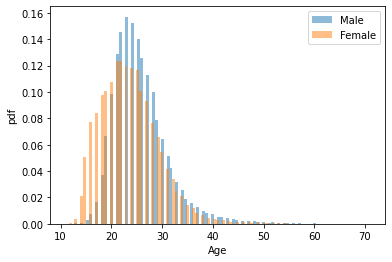

Avg Male Age: 25.700110302228104
Avg Female Age: 23.653097544069986


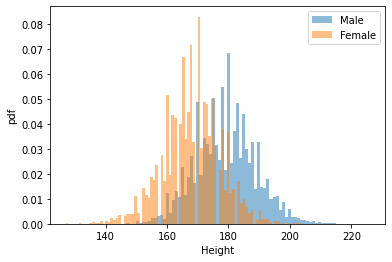

Avg Male Height: 179.01698654312818 cm
Avg Female Height: 168.18412918454132 cm


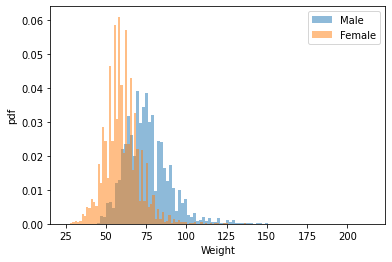

Avg Male Weight: 75.65762629605118 kg
Avg Female Weight: 60.089217137183645 kg


In [38]:
dataF=np.array(dataF)
dataM=np.array(dataM)

plt.hist(dataM[:,0],bins=100,alpha=0.5,label='Male',density=True)
plt.hist(dataF[:,0],bins=100,alpha=0.5,label='Female',density=True)
plt.legend()
plt.xlabel('Age')
plt.ylabel('pdf')
plt.show()
print("Avg Male Age:",np.mean(dataM[:,0]))
print("Avg Female Age:",np.mean(dataF[:,0]))

plt.hist(dataM[:,1],bins=100,alpha=0.5,label='Male',density=True)
plt.hist(dataF[:,1],bins=100,alpha=0.5,label='Female',density=True)
plt.legend()
plt.xlabel('Height')
plt.ylabel('pdf')
plt.show()
print("Avg Male Height:",np.mean(dataM[:,1]),"cm")
print("Avg Female Height:",np.mean(dataF[:,1],),"cm")

plt.hist(dataM[:,2],bins=100,alpha=0.5,label='Male',density=True)
plt.hist(dataF[:,2],bins=100,alpha=0.5,label='Female',density=True)
plt.legend()
plt.xlabel('Weight')
plt.ylabel('pdf')
plt.show()
print("Avg Male Weight:",np.mean(dataM[:,2]),"kg")
print("Avg Female Weight:",np.mean(dataF[:,2]),"kg")

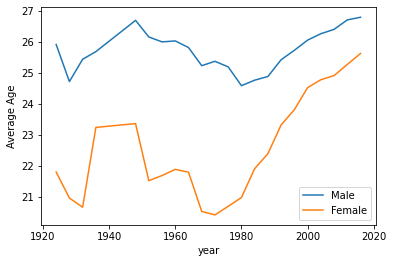

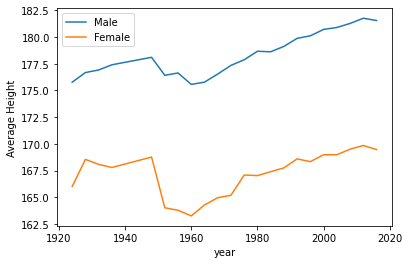

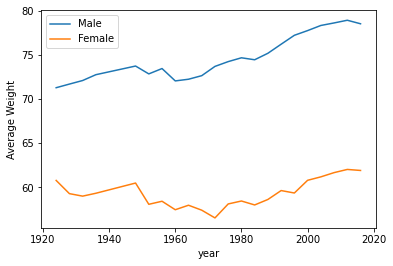

In [40]:
def cmp(a):
    return a[0]

detM={}
detF={}

for i in dataM:
    if(i[3] not in detM):
        detM[i[3]]=[[],[],[]]
    detM[i[3]][0].append(i[0])
    detM[i[3]][1].append(i[1])
    detM[i[3]][2].append(i[2])

for i in dataF:
    if(i[3] not in detF):
        detF[i[3]]=[[],[],[]]
    detF[i[3]][0].append(i[0])
    detF[i[3]][1].append(i[1])
    detF[i[3]][2].append(i[2])

AvgM=[]
AvgF=[]

for i in detM:
    if(int(i)<1924):
        continue
    AvgM.append([i,np.mean(detM[i][0]),np.mean(detM[i][1]),np.mean(detM[i][2])])
for i in detF:
    if(int(i)<1924):
        continue
    AvgF.append([i,np.mean(detF[i][0]),np.mean(detF[i][1]),np.mean(detF[i][2])])

AvgM=np.array(AvgM)
AvgF=np.array(AvgF)
AvgM=np.array(sorted(AvgM,key=cmp))
AvgF=np.array(sorted(AvgF,key=cmp))

plt.plot(AvgM[:,0],AvgM[:,1],label='Male')
plt.plot(AvgF[:,0],AvgF[:,1],label='Female')
plt.xlabel('year')
plt.ylabel('Average Age')
plt.legend()
plt.show()

plt.plot(AvgM[:,0],AvgM[:,2],label='Male')
plt.plot(AvgF[:,0],AvgF[:,2],label='Female')
plt.xlabel('year')
plt.ylabel('Average Height')
plt.legend()
plt.show()

plt.plot(AvgM[:,0],AvgM[:,3],label='Male')
plt.plot(AvgF[:,0],AvgF[:,3],label='Female')
plt.xlabel('year')
plt.ylabel('Average Weight')
plt.legend()
plt.show()

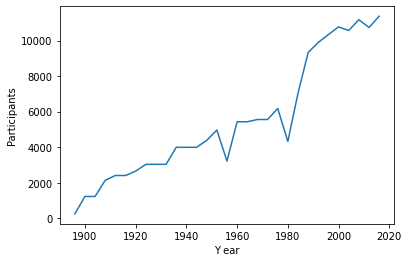

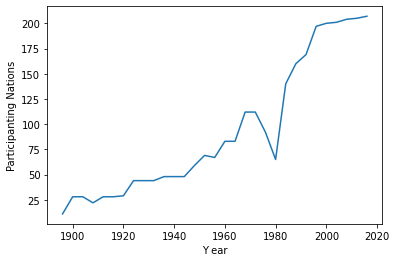

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

df1=pd.read_csv('Olympic-Data/Participation_Country_Year.csv')
year_c={}
for i in range(len(df1['Year'])):
    if(df1['Year'][i] not in year_c):
        year_c[df1['Year'][i]]=[0,0]
    year_c[df1['Year'][i]][0]+=df1['Participants'][i]
    year_c[df1['Year'][i]][1]+=1

par=[]
for i in year_c:
    par.append([i,year_c[i][0],year_c[i][1]])
par=np.array(par)
plt.plot(par[:,0],par[:,1])
plt.xlabel('Y ear')
plt.ylabel('Participants')
plt.show()
plt.plot(par[:,0],par[:,2],label='Won Medla')
plt.xlabel('Y ear')
plt.ylabel('Participanting Nations')
plt.show()

## Country Level

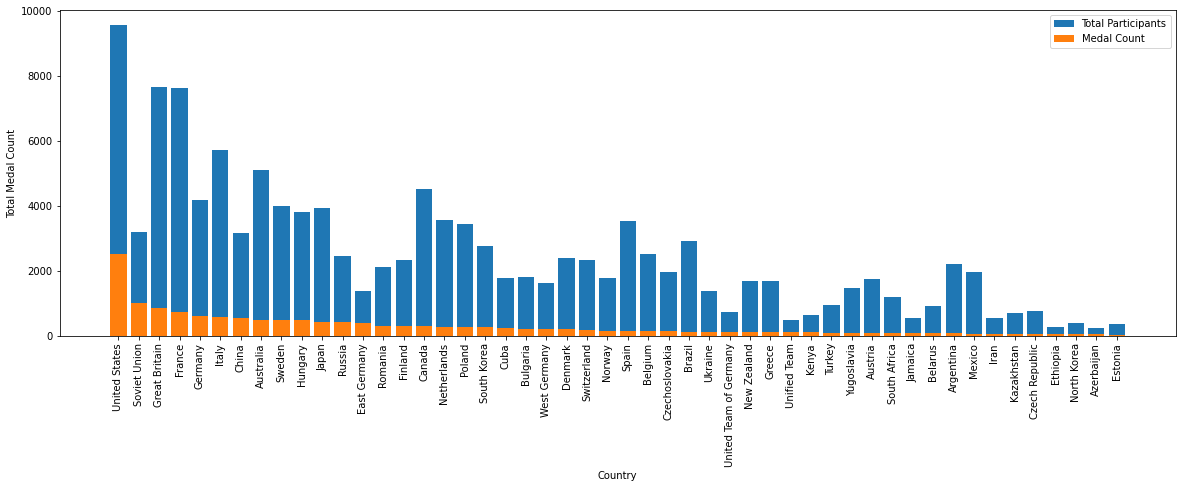

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def cmp(a):
    return -a[0]

def ext(a,b,c):
    er=[]
    for i in range(min([len(a),c])):
        er.append(a[i][b])
    return er

df2=pd.read_csv('Olympic-Data/Olympic_data_tr.csv')
country={}
for i in range(len(df2)):
    if(df2['Country'][i] not in country):
        country[df2['Country'][i]]=[0,0]
    country[df2['Country'][i]][0]+=df2['Participation'][i]
    country[df2['Country'][i]][1]+=df2['Total'][i]

count=[]
for ct in country:
    count.append([country[ct][1],country[ct][0],ct])
count=sorted(count,key=cmp)
plt.rcParams["figure.figsize"] = (20,6)
plt.xticks(rotation='vertical')
plt.bar(ext(count,2,50),ext(count,1,50),label='Total Participants')
plt.bar(ext(count,2,50),ext(count,0,50),label='Medal Count')
plt.legend()
plt.xlabel('Country')
plt.ylabel('Total Medal Count')
plt.show()

In [8]:
def che(a):
    if(a is None or str(a)=='NA' or str(a)=='nan'):
        return True
    return False

def cmp(a):
    return -a[4]

def ext(a,b,c):
    er=[]
    for i in range(min([len(a),c])):
        er.append(a[i][b])
    return er


country={}
for i in range(len(df)):
    if(df['Season'][i]!='Summer'):
        continue
    if(che(df['Age'][i]) or che(df['Height'][i]) or che(df['Weight'][i]) or che(df['Team'][i])):
        continue
    if(df['Team'][i] not in country):
        country[df['Team'][i]]=[[],[],[]]
    country[df['Team'][i]][0].append(df['Age'][i])
    country[df['Team'][i]][1].append(df['Height'][i])
    country[df['Team'][i]][2].append(df['Weight'][i])

count=[]
for ct in country:
    count.append([ct,np.mean(country[ct][0]),np.mean(country[ct][1]),np.mean(country[ct][2]),len(country[ct][2])])
count=sorted(count,key=cmp)

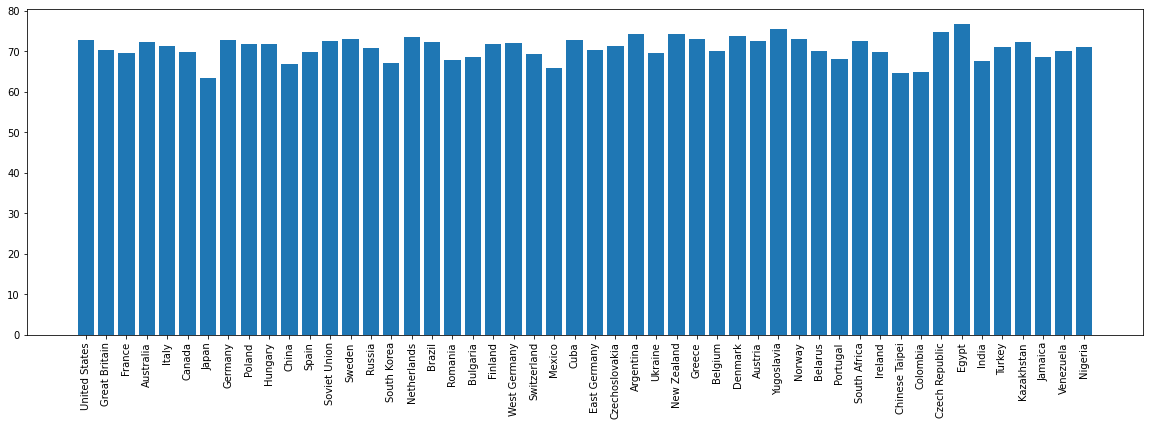

In [9]:
plt.rcParams["figure.figsize"] = (20,6)
plt.bar(ext(count,0,50),ext(count,3,50))
plt.xticks(rotation='vertical')
plt.show()

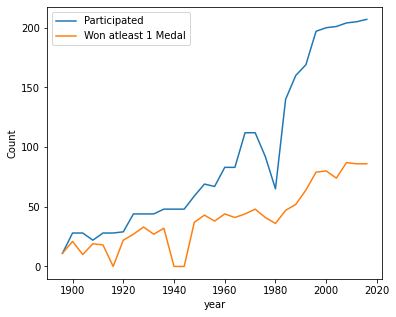

In [16]:
plt.rcParams["figure.figsize"] = (6,5)

year={}
for i in range(len(df1)):
    if(df1['Year'][i] not in year):
        year[df1['Year'][i]]=[0,0]
    year[df1['Year'][i]][0]+=1
    
for i in range(len(df2)):
    if(df2['Year'][i] not in year):
        year[df2['Year'][i]]=[0,0]
    year[df2['Year'][i]][1]+=1

yt=[]
for i in year:
    yt.append([i,year[i][0],year[i][1]])
yt=np.array(yt)
plt.plot(yt[:,0],yt[:,1],label='Participated')
plt.plot(yt[:,0],yt[:,2],label='Won atleast 1 Medal')
plt.xlabel('year')
plt.ylabel('Count')
plt.legend()

## Sport Level

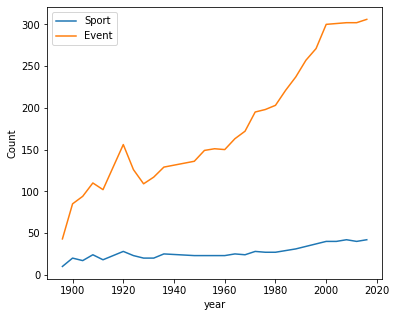

array([ 43,  85,  94, 110, 102, 156, 126, 109, 117, 129, 136, 149, 151,
       150, 163, 172, 195, 198, 203, 221, 237, 257, 271, 300, 301, 302,
       302, 306], dtype=int64)

In [19]:
def cmp(a):
    return a[0]

df3=pd.read_csv('Olympic-Data/Sport.csv')
year={}
for i in range(len(df3['Year'])):
    if(df3['Year'][i]==2020):
        continue
    if(df3['Year'][i] not in year):
        year[df3['Year'][i]]=[[],0]
    year[df3['Year'][i]][0].append(df3['Sport'][i])
    year[df3['Year'][i]][1]+=df3['Event'][i]

yt=[]
for i in year:
    yt.append([i,len(np.unique(year[i][0])),year[i][1]])
yt=sorted(yt,key=cmp)
yt=np.array(yt)
plt.plot(yt[:,0],yt[:,1],label='Sport')
plt.plot(yt[:,0],yt[:,2],label='Event')
plt.xlabel('year')
plt.ylabel('Count')
plt.legend()
plt.show()
yt[:,2]

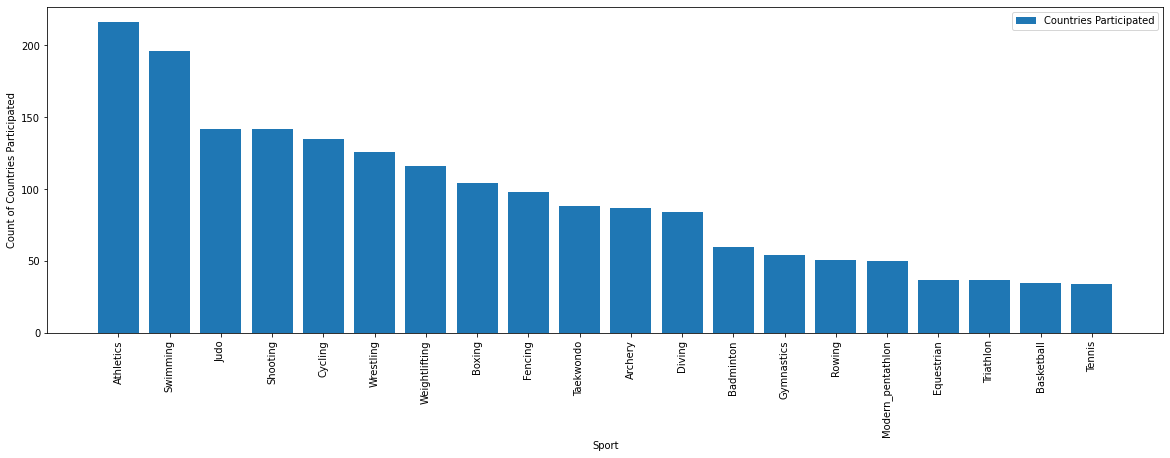

In [34]:
def cmp(a):
    return -a[1]

def ext(a,b,c):
    er=[]
    for i in range(min([len(a),c])):
        er.append(a[i][b])
    return er
country={}
df4=pd.read_csv('Olympic-Data/Sport_Part.csv')
for i in range(len(df4)):
    if(df4['Sport'][i] not in country):
        country[df4['Sport'][i]]=[]
    country[df4['Sport'][i]].append(df4['Country'][i])
data=[]
for i in country:
    data.append([i,len(np.unique(country[i]))])
data=sorted(data,key=cmp)

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(ext(data,0,20),ext(data,1,20),label='Countries Participated')
plt.xticks(rotation='vertical')
plt.xlabel('Sport')
plt.ylabel('Count of Countries Participated')
plt.legend()
plt.show()

## Host Country Effect

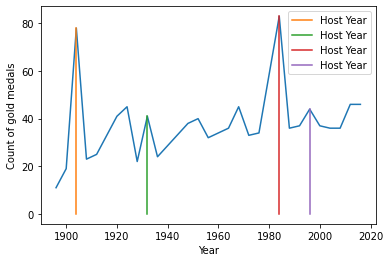

In [36]:
host_year=[1904,1932,1984,1996]
host_data=[]
data=[]
for i in range(len(df2)):
    if(df2['Country'][i]=='United States'):
        data.append([df2['Year'][i],df2['Gold'][i]])
        if(df2['Year'][i] in host_year):
            host_data.append([df2['Year'][i],df2['Gold'][i]])
data=np.array(data)
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(data[:,0],data[:,1])
for i in host_data:
    plt.plot([i[0],i[0]],[0,i[1]],label='Host Year')
plt.xlabel('year')
plt.ylabel('Count of gold medals')
plt.legend()
plt.show()

## Efficiency

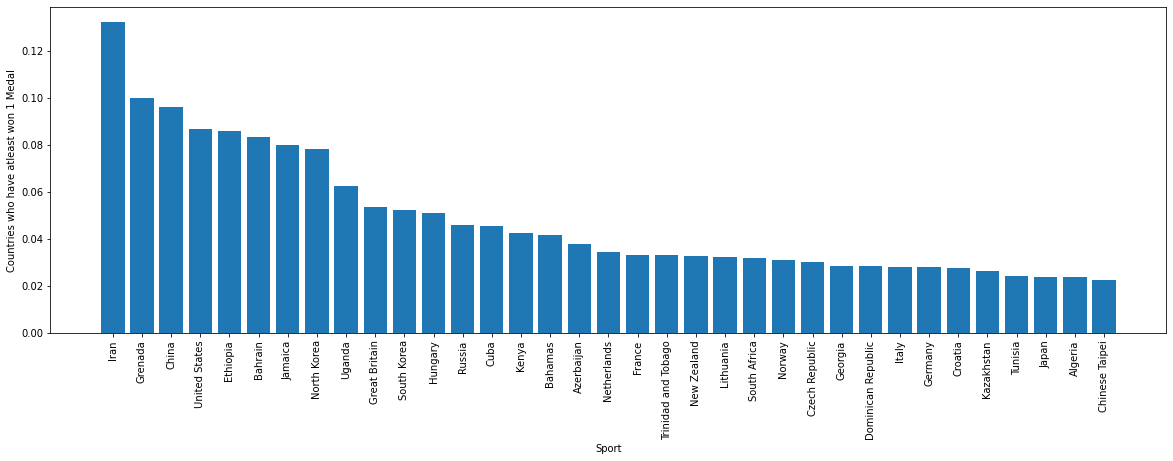

In [14]:
def cmp(a):
    return -a[1]

def ext(a,b,c):
    er=[]
    for i in range(min([len(a),c])):
        er.append(a[i][b])
    return er

eff=[]
for i in range(len(df2)):
    if(df2['Year'][i]==2012):
        eff.append([df2['Country'][i],(df2['Gold'][i]+0.0)/df2['Participation'][i]])
eff=sorted(eff,key=cmp)

plt.rcParams["figure.figsize"] = (20,6)
plt.bar(ext(eff,0,35),ext(eff,1,35))
plt.xticks(rotation='vertical')
plt.xlabel('Sport')
plt.ylabel('Countries who have atleast won 1 Medal')
plt.show()